[View in Colaboratory](https://colab.research.google.com/github/SakshiPriya/BAG-OF-WORDS/blob/master/cbow.ipynb)

In [1]:
!pip install torch


    100% |████████████████████████████████| 519.5MB 22kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x56117ab54000 @  0x7f0d94e231c4 0x561121fbd0d8 0x5611220a6d5d 0x561121fd077a 0x561121fd5462 0x561121fcdb3a 0x561121fd582e 0x561121fcdb3a 0x561121fd582e 0x561121fcdb3a 0x561121fd582e 0x561121fcdb3a 0x561121fd5e1f 0x561121fcdb3a 0x561121fd582e 0x561121fcdb3a 0x561121fd582e 0x561121fd5462 0x561121fd5462 0x561121fcdb3a 0x561121fd5e1f 0x561121fd5462 0x561121fcdb3a 0x561121fd5e1f 0x561121fcdb3a 0x561121fd5e1f 0x561121fcdb3a 0x561121fd582e 0x561121fcdb3a 0x561121ffe50f 0x561121ff9202


In [2]:
 !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
 !add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
 !apt-get update -qq 2>&1 > /dev/null
 !apt-get -y install -qq google-drive-ocamlfuse fuse
 from google.colab import auth
 auth.authenticate_user()
 from oauth2client.client import GoogleCredentials
 creds = GoogleCredentials.get_application_default()
 import getpass
 !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
 vcode = getpass.getpass()
 !echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import torch.optim  as optim
import unicodedata
from io import open
import re
import numpy as np
import matplotlib.pyplot as plt

In [0]:
file='drive/app/deeplearning.txt'
window=1
f=open(file,'r')
text=f.read()
text=re.sub('\W+',' ',text)
text=unicodedata.normalize('NFKD',text).encode('ascii','ignore').split(' ')
vocab=list(set(text))
textlen=len(text)
vocablen=len(vocab)
vocabdic={vocab[i]:i for i in range(vocablen)}
ix_to_vocab={i:vocab[i] for i in range(vocablen)}
def word_to_ix(li1,li2):
  a=[]
  li1.extend(li2)
  for i in li1:
    a.append(vocabdic[i])
  return np.array(a)

inputs=np.array([word_to_ix(text[i-window:i],text[i+1:i+window+1]) for i in range(window,textlen-window)])
targets=np.array([word_to_ix([text[i]],[]) for i in range(window,textlen-window)])
inputs=torch.from_numpy(inputs)
targets=torch.from_numpy(targets)




In [0]:
class cbow(nn.Module):
  def __init__(self,vocabsize,featuresize):
    super(cbow,self).__init__()
    self.layer1=nn.Linear(vocabsize,featuresize)
    self.layer2=nn.Linear(featuresize,vocabsize)
    
  def forward(self,inputs):
    y=torch.mean(self.layer1(inputs),dim=1,keepdim=True)
    y=self.layer2(y)
    return y
      
features=300
cb=cbow(vocablen,features)


In [0]:
inlen=inputs.size()[0]
a=torch.zeros(inlen,window*2,vocablen)
for i in range(inlen):
    b=torch.zeros(window*2,vocablen,dtype=torch.long)
    for j in range(window*2):
      b[j][inputs[i][j]]=1
    a[i]=b


In [0]:
all_loss=[]
def train(a,targets,num_epoch=1000):
  criterion=nn.CrossEntropyLoss()
  optimizer=optim.Adam(cb.parameters())
  for i in range(num_epoch):
    optimizer.zero_grad()
    out=cb(a)
    out=out.view(out.size()[0],-1)
    loss=criterion(out,targets)
    loss.backward()
    if i%10==0:
      all_loss.append(loss)
      print('loss in epoch {}:{}'.format(i,loss))
    optimizer.step()
    
  


In [0]:

targets=targets.view(targets.size()[0])

train(a,targets)


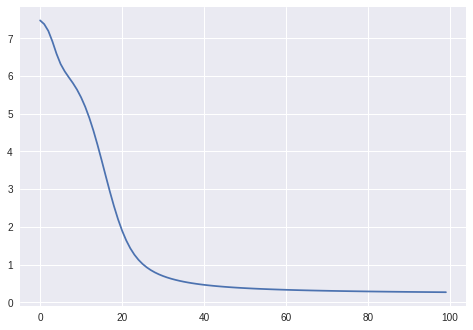

In [165]:
plt.ion()
plt.figure()
plt.plot(all_loss)
plt.show()


In [168]:
def pred(context):
  contextix=word_to_ix(context,[])
  b=torch.zeros(1,window*2,vocablen)
  for j in range(len(contextix)):
    b[0][j][contextix[j]]=1
  out=cb(b)
  out=out.view(out.size()[2])
  index=torch.topk(out,1)
  outw=ix_to_vocab[index[1].item()]
  print(outw)
  print(' '.join(context[0:4])+' '+str(outw)+' '+' '.join(context[4:8]))
    
    
pred(['deep','learning' ])



structured
deep learning structured 


In [0]:
 Deep Learning is a new area of Machine Learning research, which has been introduced 